In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
#load in AirBnB dataframe
AirBnB = pd.read_csv('../data/Listings_cleaned.csv', dtype={'host_response_time':object, 'host_response_rate':np.float64})

In [3]:
AirBnB = AirBnB.drop(columns='Unnamed: 0')

In [4]:
AirBnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279368 entries, 0 to 279367
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279368 non-null  int64  
 1   name                         279196 non-null  object 
 2   host_id                      279368 non-null  int64  
 3   host_since                   279203 non-null  object 
 4   host_location                278530 non-null  object 
 5   host_response_time           150749 non-null  object 
 6   host_response_rate           150749 non-null  float64
 7   host_acceptance_rate         166443 non-null  float64
 8   host_is_superhost            279203 non-null  object 
 9   host_total_listings_count    279203 non-null  float64
 10  host_has_profile_pic         279203 non-null  object 
 11  host_identity_verified       279203 non-null  object 
 12  neighbourhood                279368 non-null  object 
 13 

In [5]:
AirBnB.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,tv,pool,hot water,hot tub,bed linens,gym,waterfront,beachfront,hdtv,parking
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,False,False,False,False,False,False,False,False,False,False
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,False,False,False,False,False,False,False,False,False,False
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,True,False,False,False,False,False,False,False,False,False
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,True,False,False,False,False,False,False,False,False,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,True,False,False,False,False,False,False,False,False,False


In [6]:
#load in city_summary dataframe
city_summary = pd.read_csv('../data/Cities_Summary.csv')

In [7]:
city_summary = city_summary.drop(columns='Unnamed: 0')

In [8]:
city_summary

,city,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating
0,Bangkok,19280,23621.0,370527,61468,92.996950
1,Cape Town,19022,35425.0,449106,73504,94.402771
2,Hong Kong,7085,7669.0,107241,19862,89.704792
3,Istanbul,24495,34068.0,480734,78616,91.069328
4,Mexico City,20037,28858.0,413813,61028,94.835728
5,New York,36984,43973.0,756268,103491,93.767188
6,Paris,64628,70222.0,1135617,196508,93.063931
7,Rio de Janeiro,26566,42368.0,475827,110533,94.576457
8,Rome,27641,39971.0,591228,103456,93.516489
9,Sydney,33630,52402.0,682659,109869,93.234135


In [9]:
#dividing columns by the number of listings for each city to get their relationship
city_summary['bedrooms_per_listing'] = city_summary.city_total_bedrooms / city_summary.listings_per_city
city_summary['amenities_per_listing'] = city_summary.city_total_amenities / city_summary.listings_per_city
city_summary['accommodates_per_listing'] = city_summary.city_total_accommodates / city_summary.listings_per_city

In [10]:
#make the city column the new index
city_summary_newind = city_summary.set_index('city')

In [11]:
city_summary_newind

,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating,bedrooms_per_listing,amenities_per_listing,accommodates_per_listing
city,,,,,,,,
Bangkok,19280,23621.0,370527,61468,92.996950,1.225156,19.218205,3.188174
Cape Town,19022,35425.0,449106,73504,94.402771,1.862317,23.609820,3.864157
Hong Kong,7085,7669.0,107241,19862,89.704792,1.082428,15.136344,2.803387
Istanbul,24495,34068.0,480734,78616,91.069328,1.390814,19.625801,3.209471
Mexico City,20037,28858.0,413813,61028,94.835728,1.440236,20.652443,3.045765
New York,36984,43973.0,756268,103491,93.767188,1.188974,20.448518,2.798264
Paris,64628,70222.0,1135617,196508,93.063931,1.086557,17.571594,3.040602
Rio de Janeiro,26566,42368.0,475827,110533,94.576457,1.594820,17.911127,4.160694
Rome,27641,39971.0,591228,103456,93.516489,1.446076,21.389530,3.742846


Paris clearly has the most listings of any city and therefore also has the most total bedrooms, amenities and has the most total number of people they can accommodate. Inversely, Hong Kong has the list listings and therefore the least of all the other features. But how do they compare on a per listing basis?

In [12]:
city_summary_newind.bedrooms_per_listing.sort_values(ascending=False)

city
Cape Town         1.862317
Rio de Janeiro    1.594820
Sydney            1.558192
Rome              1.446076
Mexico City       1.440236
Istanbul          1.390814
Bangkok           1.225156
New York          1.188974
Paris             1.086557
Hong Kong         1.082428
Name: bedrooms_per_listing, dtype: float64

In [13]:
city_summary_newind.accommodates_per_listing.sort_values(ascending=False)

city
Rio de Janeiro    4.160694
Cape Town         3.864157
Rome              3.742846
Sydney            3.266994
Istanbul          3.209471
Bangkok           3.188174
Mexico City       3.045765
Paris             3.040602
Hong Kong         2.803387
New York          2.798264
Name: accommodates_per_listing, dtype: float64

In [14]:
city_summary_newind.amenities_per_listing.sort_values(ascending=False)

city
Cape Town         23.609820
Rome              21.389530
Mexico City       20.652443
New York          20.448518
Sydney            20.299108
Istanbul          19.625801
Bangkok           19.218205
Rio de Janeiro    17.911127
Paris             17.571594
Hong Kong         15.136344
Name: amenities_per_listing, dtype: float64

Paris is low on all the features on a per listing basis meaning it has a lot of listings but many of the individual listings don't have a ton of bedrooms, amenities, etc. This could be due to space issues and having many smaller listings rather than large ones.

Surprisingly, Hong Kong is also low on all features despite not having many listings. Seems that Hong Kong doesn't have many listings and also the listings they do have are on average fairly small. Also likely due to Hong Kong being a crowded city with space issues.

Cape Town, Rome and Rio de Janeiro seem to have listings on the larger size with more bedrooms that can accommodate more people on average.

In [15]:
city_summary_newind.city_avg_review_scores_rating.sort_values(ascending=False)

city
Mexico City       94.835728
Rio de Janeiro    94.576457
Cape Town         94.402771
New York          93.767188
Rome              93.516489
Sydney            93.234135
Paris             93.063931
Bangkok           92.996950
Istanbul          91.069328
Hong Kong         89.704792
Name: city_avg_review_scores_rating, dtype: float64

The cities with larger listings on average appear to be rated a bit higher on average compared to the smaller listings, with Hong Kong being the lowest rated. 

Lets see if we can make any deductions from looking at the population and area of the cities.

In [16]:
#creating a dictionary to hold the population and area in square miles for each city
pop_and_area_dict = {0 : ['Bangkok', 10690000, 602], 1 : ['Cape Town', 4618000, 944], 2 : ['Hong Kong', 7413000, 430], 
                     3 : ['Istanbul', 15460000, 2063], 4 : ['Mexico City', 8855000, 573], 5 : ['New York', 8468000, 302.6], 
                     6 : ['Paris', 2161000, 40.7], 7 : ['Rio de Janeiro', 6748000, 463], 8 : ['Rome', 2873000, 496], 
                     9 : ['Sydney', 5312000, 4775]}

In [17]:
#turning the dictionary into a dataframe
pop_and_area_df = pd.DataFrame.from_dict(pop_and_area_dict, orient='index', columns=['city','population', 'area_sq_mi'])

In [18]:
pop_and_area_df

,city,population,area_sq_mi
0,Bangkok,10690000,602.0
1,Cape Town,4618000,944.0
2,Hong Kong,7413000,430.0
3,Istanbul,15460000,2063.0
4,Mexico City,8855000,573.0
5,New York,8468000,302.6
6,Paris,2161000,40.7
7,Rio de Janeiro,6748000,463.0
8,Rome,2873000,496.0
9,Sydney,5312000,4775.0


In [19]:
#creating a column for density from our other columns
pop_and_area_df['density'] = pop_and_area_df.population / pop_and_area_df.area_sq_mi

In [20]:
pop_and_area_df

,city,population,area_sq_mi,density
0,Bangkok,10690000,602.0,17757.475083
1,Cape Town,4618000,944.0,4891.949153
2,Hong Kong,7413000,430.0,17239.534884
3,Istanbul,15460000,2063.0,7493.940863
4,Mexico City,8855000,573.0,15453.752182
5,New York,8468000,302.6,27984.137475
6,Paris,2161000,40.7,53095.823096
7,Rio de Janeiro,6748000,463.0,14574.514039
8,Rome,2873000,496.0,5792.338710
9,Sydney,5312000,4775.0,1112.460733


In [21]:
pop_and_area_df.set_index('city').density.sort_values(ascending=False)

city
Paris             53095.823096
New York          27984.137475
Bangkok           17757.475083
Hong Kong         17239.534884
Mexico City       15453.752182
Rio de Janeiro    14574.514039
Istanbul           7493.940863
Rome               5792.338710
Cape Town          4891.949153
Sydney             1112.460733
Name: density, dtype: float64

The cities with smaller listings on average coincide with the more densely populated cities and vice versa for the cities with the larger listings on average.

In [22]:
#creating listings_per_capita and listings_per_sq_mile columns to add to our city_summary df
city_summary['listings_per_capita'] = city_summary.listings_per_city / pop_and_area_df.population
city_summary['listings_per_sq_mile'] = city_summary.listings_per_city / pop_and_area_df.area_sq_mi

In [23]:
city_summary.T

,0,1,2,3,4,5,6,7,8,9
city,Bangkok,Cape Town,Hong Kong,Istanbul,Mexico City,New York,Paris,Rio de Janeiro,Rome,Sydney
listings_per_city,19280,19022,7085,24495,20037,36984,64628,26566,27641,33630
city_total_bedrooms,23621.0,35425.0,7669.0,34068.0,28858.0,43973.0,70222.0,42368.0,39971.0,52402.0
city_total_amenities,370527,449106,107241,480734,413813,756268,1135617,475827,591228,682659
city_total_accommodates,61468,73504,19862,78616,61028,103491,196508,110533,103456,109869
city_avg_review_scores_rating,92.99695,94.402771,89.704792,91.069328,94.835728,93.767188,93.063931,94.576457,93.516489,93.234135
bedrooms_per_listing,1.225156,1.862317,1.082428,1.390814,1.440236,1.188974,1.086557,1.59482,1.446076,1.558192
amenities_per_listing,19.218205,23.60982,15.136344,19.625801,20.652443,20.448518,17.571594,17.911127,21.38953,20.299108
accommodates_per_listing,3.188174,3.864157,2.803387,3.209471,3.045765,2.798264,3.040602,4.160694,3.742846,3.266994
listings_per_capita,0.001804,0.004119,0.000956,0.001584,0.002263,0.004368,0.029907,0.003937,0.009621,0.006331


In [24]:
city_summary.set_index('city').listings_per_capita.sort_values(ascending=False)

city
Paris             0.029907
Rome              0.009621
Sydney            0.006331
New York          0.004368
Cape Town         0.004119
Rio de Janeiro    0.003937
Mexico City       0.002263
Bangkok           0.001804
Istanbul          0.001584
Hong Kong         0.000956
Name: listings_per_capita, dtype: float64

In [25]:
city_summary.set_index('city').listings_per_sq_mile.sort_values(ascending=False)

city
Paris             1587.911548
New York           122.220753
Rio de Janeiro      57.377970
Rome                55.727823
Mexico City         34.968586
Bangkok             32.026578
Cape Town           20.150424
Hong Kong           16.476744
Istanbul            11.873485
Sydney               7.042932
Name: listings_per_sq_mile, dtype: float64

Paris really stands out as a city with a ton of listings compared to how much space and how many people live there. AirBnB must be popular there or the tourism in Paris opens up the market for them more than other cities perhaps.

<AxesSubplot:>

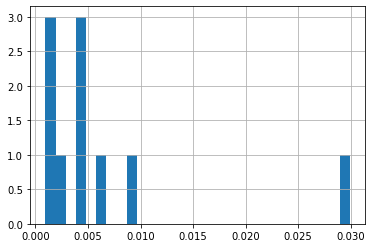

In [26]:
city_summary.listings_per_capita.hist(bins=30)

<AxesSubplot:>

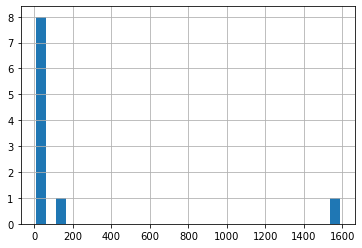

In [27]:
city_summary.listings_per_sq_mile.hist(bins=30)

We will scale the city_summary df next to be able to perform PCA on it.

In [28]:
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
city_summary_scale = city_summary.set_index('city')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
city_summary_index = city_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
city_summary_columns = city_summary_scale.columns
city_summary_scale.T

city,Bangkok,Cape Town,Hong Kong,Istanbul,Mexico City,New York,Paris,Rio de Janeiro,Rome,Sydney
listings_per_city,19280.000000,19022.000000,7085.000000,24495.000000,20037.000000,36984.000000,6.462800e+04,26566.000000,27641.000000,33630.000000
city_total_bedrooms,23621.000000,35425.000000,7669.000000,34068.000000,28858.000000,43973.000000,7.022200e+04,42368.000000,39971.000000,52402.000000
city_total_amenities,370527.000000,449106.000000,107241.000000,480734.000000,413813.000000,756268.000000,1.135617e+06,475827.000000,591228.000000,682659.000000
city_total_accommodates,61468.000000,73504.000000,19862.000000,78616.000000,61028.000000,103491.000000,1.965080e+05,110533.000000,103456.000000,109869.000000
city_avg_review_scores_rating,92.996950,94.402771,89.704792,91.069328,94.835728,93.767188,9.306393e+01,94.576457,93.516489,93.234135
bedrooms_per_listing,1.225156,1.862317,1.082428,1.390814,1.440236,1.188974,1.086557e+00,1.594820,1.446076,1.558192
amenities_per_listing,19.218205,23.609820,15.136344,19.625801,20.652443,20.448518,1.757159e+01,17.911127,21.389530,20.299108
accommodates_per_listing,3.188174,3.864157,2.803387,3.209471,3.045765,2.798264,3.040602e+00,4.160694,3.742846,3.266994
listings_per_capita,0.001804,0.004119,0.000956,0.001584,0.002263,0.004368,2.990652e-02,0.003937,0.009621,0.006331
listings_per_sq_mile,32.026578,20.150424,16.476744,11.873485,34.968586,122.220753,1.587912e+03,57.377970,55.727823,7.042932


In [29]:
city_summary_scale = scale(city_summary_scale)

In [30]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
city_summary_scaled_df = pd.DataFrame(city_summary_scale, index=city_summary_index, columns=city_summary_columns)
city_summary_scaled_df.T

city,Bangkok,Cape Town,Hong Kong,Istanbul,Mexico City,New York,Paris,Rio de Janeiro,Rome,Sydney
listings_per_city,-0.593720,-0.611415,-1.430106,-0.236053,-0.541802,0.620496,2.516439,-0.094015,-0.020287,0.390464
city_total_bedrooms,-0.893905,-0.152746,-1.895512,-0.237951,-0.565080,0.383972,2.032115,0.283196,0.132692,0.913219
city_total_amenities,-0.678104,-0.374962,-1.693806,-0.252948,-0.511115,0.810005,2.273455,-0.271878,0.173315,0.526037
city_total_accommodates,-0.688274,-0.415462,-1.631328,-0.299592,-0.698247,0.264232,2.372584,0.423849,0.263439,0.408798
city_avg_review_scores_rating,-0.078693,0.844539,-2.240722,-1.344603,1.128871,0.427139,-0.034705,0.958603,0.262499,0.077071
bedrooms_per_listing,-0.690478,2.018527,-1.297311,0.013850,0.223972,-0.844313,-1.279755,0.881217,0.248806,0.725485
amenities_per_listing,-0.166892,1.824511,-2.017834,0.017935,0.483472,0.391001,-0.913557,-0.759594,0.817708,0.323250
accommodates_per_listing,-0.283724,1.264723,-1.165139,-0.234940,-0.609934,-1.176875,-0.621763,1.943988,0.986840,-0.103175
listings_per_capita,-0.572685,-0.289655,-0.676312,-0.599471,-0.516552,-0.259292,2.862354,-0.311929,0.382840,-0.019299
listings_per_sq_mile,-0.349164,-0.374674,-0.382565,-0.392453,-0.342844,-0.155425,2.992917,-0.294708,-0.298253,-0.402829


Check the scaling by seeing if the mean of each column is close to 0 and the standard deviation is 1. 

In [31]:
city_summary_scaled_df.mean()

listings_per_city                5.551115e-17
city_total_bedrooms              1.665335e-16
city_total_amenities             6.661338e-17
city_total_accommodates          1.110223e-17
city_avg_review_scores_rating   -8.421042e-15
bedrooms_per_listing            -4.551914e-16
amenities_per_listing            6.106227e-17
accommodates_per_listing        -5.440093e-16
listings_per_capita              4.336809e-17
listings_per_sq_mile            -1.110223e-17
dtype: float64

In [32]:
city_summary_scaled_df.std(ddof=0)

listings_per_city                1.0
city_total_bedrooms              1.0
city_total_amenities             1.0
city_total_accommodates          1.0
city_avg_review_scores_rating    1.0
bedrooms_per_listing             1.0
amenities_per_listing            1.0
accommodates_per_listing         1.0
listings_per_capita              1.0
listings_per_sq_mile             1.0
dtype: float64

Now let's reduce the dimensionality of the data by using a PCA transformation on it and visualizing the variance explained by the components.

In [56]:
city_pca = PCA().fit(city_summary_scaled_df)

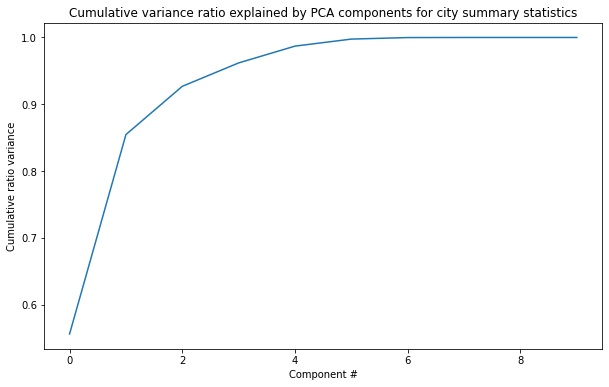

In [57]:
#plot the variance explained by the PCA components cumulatively 
plt.subplots(figsize=(10, 6))
plt.plot(city_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for city summary statistics');

First 2 components seem to account for around 85% of the variance and the first 4 around 95%.

In [58]:
#Call `city_pca`'s `transform()` method, passing in `city_summary_scale` as its argument
city_pca_x = city_pca.transform(city_summary_scale)

In [59]:
city_pca_x.shape

(10, 10)

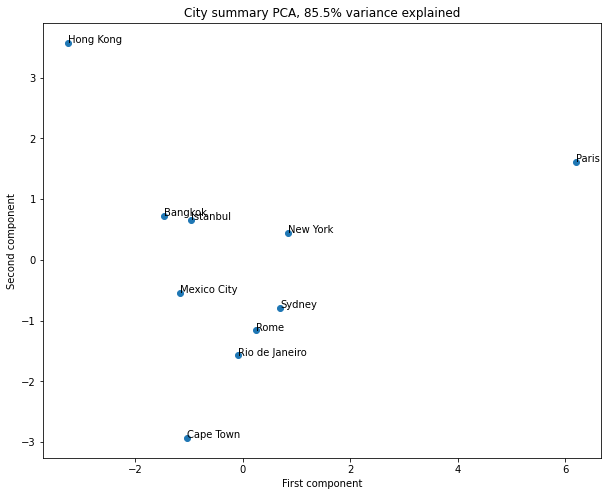

In [60]:
#plot the cities according to their position relative to the first 2 PCA components
x = city_pca_x[:, 0]
y = city_pca_x[:, 1]
city = city_summary_index
pc_var = 100 * city_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'City summary PCA, {pc_var:.1f}% variance explained')
for c, x, y in zip(city, x, y):
    plt.annotate(c, (x, y))

Paris is further to the right (larger first component) compared to the other cities and Hong Kong is further up and to the left (smaller first component and larger second component) compared to all the other cities. We will later see which features affect each component the most to see why this is the case.

In [61]:
#work out the average price of a listing for each individual city
city_avg_price = AirBnB.groupby('city')['price'].mean()
city_avg_price

city
Bangkok           1777.653942
Cape Town         2137.335559
Hong Kong          725.162315
Istanbul           447.117412
Mexico City       1035.168987
New York           142.950384
Paris              113.204942
Rio de Janeiro     593.338967
Rome               105.130458
Sydney             222.013440
Name: price, dtype: float64

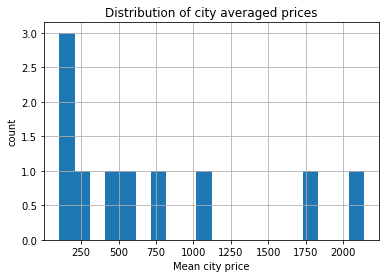

In [62]:
city_avg_price.hist(bins=20)
plt.title('Distribution of city averaged prices')
plt.xlabel('Mean city price')
plt.ylabel('count');

In [40]:
#Create a dataframe containing the values of the first two PCA components
pca_df = pd.DataFrame({'PC1': city_pca_x[:, 0], 'PC2': city_pca_x[:, 1]}, index=city_summary_index)
pca_df

,PC1,PC2
city,,
Bangkok,-1.465355,0.719019
Cape Town,-1.030817,-2.932305
Hong Kong,-3.246483,3.573233
Istanbul,-0.967120,0.661393
Mexico City,-1.165489,-0.538837
New York,0.844230,0.439664
Paris,6.188838,1.608910
Rio de Janeiro,-0.096671,-1.572950
Rome,0.246879,-1.162641


In [41]:
#cast our city_avg_price series to a dataframe also
city_avg_price.to_frame()

,price
city,
Bangkok,1777.653942
Cape Town,2137.335559
Hong Kong,725.162315
Istanbul,447.117412
Mexico City,1035.168987
New York,142.950384
Paris,113.204942
Rio de Janeiro,593.338967
Rome,105.130458


In [42]:
#concatenate `pca_df` and `city_avg_price`
pca_df = pd.concat([pca_df, city_avg_price], axis=1)
pca_df

,PC1,PC2,price
city,,,
Bangkok,-1.465355,0.719019,1777.653942
Cape Town,-1.030817,-2.932305,2137.335559
Hong Kong,-3.246483,3.573233,725.162315
Istanbul,-0.967120,0.661393,447.117412
Mexico City,-1.165489,-0.538837,1035.168987
New York,0.844230,0.439664,142.950384
Paris,6.188838,1.608910,113.204942
Rio de Janeiro,-0.096671,-1.572950,593.338967
Rome,0.246879,-1.162641,105.130458


In [43]:
#add Quartiles to the dataframe 
pca_df['Quartile'] = pd.qcut(pca_df.price, q=4, precision=1)
pca_df

,PC1,PC2,price,Quartile
city,,,,
Bangkok,-1.465355,0.719019,1777.653942,"(957.7, 2137.3]"
Cape Town,-1.030817,-2.932305,2137.335559,"(957.7, 2137.3]"
Hong Kong,-3.246483,3.573233,725.162315,"(520.2, 957.7]"
Istanbul,-0.967120,0.661393,447.117412,"(162.7, 520.2]"
Mexico City,-1.165489,-0.538837,1035.168987,"(957.7, 2137.3]"
New York,0.844230,0.439664,142.950384,"(105.0, 162.7]"
Paris,6.188838,1.608910,113.204942,"(105.0, 162.7]"
Rio de Janeiro,-0.096671,-1.572950,593.338967,"(520.2, 957.7]"
Rome,0.246879,-1.162641,105.130458,"(105.0, 162.7]"


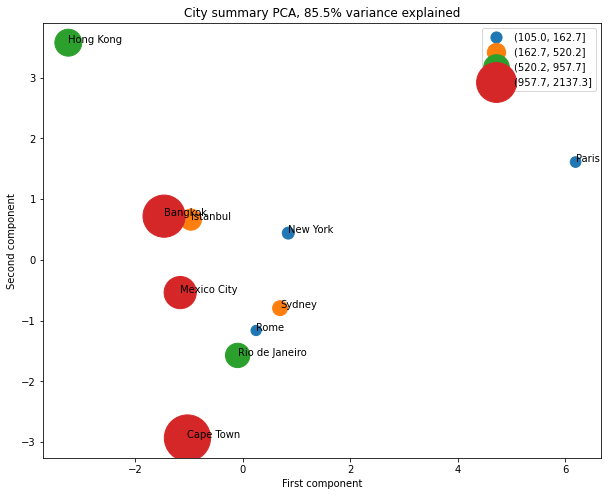

In [45]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.price
quartiles = pca_df.Quartile
city = pca_df.index
pc_var = 100 * city_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'City summary PCA, {pc_var:.1f}% variance explained')
for c, x, y in zip(city, x, y):
    plt.annotate(c, (x, y))

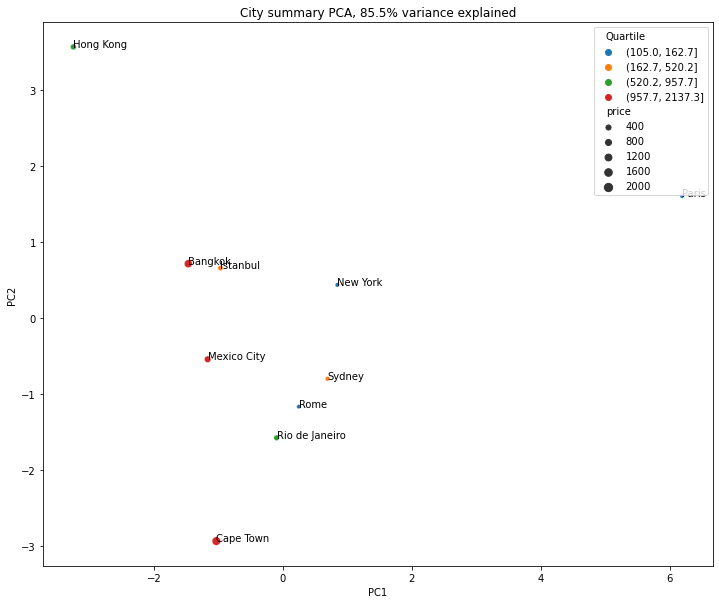

In [46]:
x = pca_df.PC1
y = pca_df.PC2
city = pca_df.index
plt.subplots(figsize=(12, 10))
sns.scatterplot(x=pca_df.PC1, y=pca_df.PC2, size=pca_df.price, hue=pca_df.Quartile, 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
for c, x, y in zip(city, x, y):
    plt.annotate(c, (x, y))   
plt.title(f'City summary PCA, {pc_var:.1f}% variance explained');

In [47]:
pd.DataFrame(city_pca.components_, columns=city_summary_columns)

,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating,bedrooms_per_listing,amenities_per_listing,accommodates_per_listing,listings_per_capita,listings_per_sq_mile
0,0.420359,0.396493,0.411935,0.414518,0.120043,-0.095068,-0.008828,-0.018424,0.397834,0.377410
1,0.019231,-0.157736,-0.050607,-0.076792,-0.461601,-0.530797,-0.477018,-0.453690,0.082239,0.176993
2,-0.082796,-0.016303,-0.205121,0.124175,-0.222469,0.170159,-0.554906,0.704823,0.171267,0.151361
3,0.027103,0.157594,0.115510,0.019961,-0.837721,0.319731,0.383095,-0.006849,0.074092,-0.066232
4,-0.195909,-0.380831,-0.212942,-0.232040,0.071987,0.065638,0.350595,-0.016064,0.505505,0.573760
5,0.014881,-0.221867,0.116180,0.127138,-0.094784,-0.695497,0.378139,0.477630,0.063914,-0.230190
6,-0.248700,0.179945,-0.031785,-0.073763,0.083567,0.012345,-0.113444,-0.135875,0.718745,-0.586732
7,-0.036300,-0.371462,0.804941,-0.370555,0.008891,0.160733,-0.193561,0.098402,0.032160,-0.036877
8,0.033406,0.595369,-0.020514,-0.725977,0.003989,-0.226456,0.032565,0.198439,-0.041754,0.153217
9,0.844069,-0.271523,-0.253235,-0.258182,-0.000963,0.112872,-0.019800,0.033063,0.145431,-0.218314


In [48]:
city_summary[city_summary.city.isin(['Hong Kong', 'Paris'])].T

,2,6
city,Hong Kong,Paris
listings_per_city,7085,64628
city_total_bedrooms,7669.0,70222.0
city_total_amenities,107241,1135617
city_total_accommodates,19862,196508
city_avg_review_scores_rating,89.704792,93.063931
bedrooms_per_listing,1.082428,1.086557
amenities_per_listing,15.136344,17.571594
accommodates_per_listing,2.803387,3.040602
listings_per_capita,0.000956,0.029907


In [49]:
AirBnB = AirBnB.merge(city_summary, how='left', on='city')
AirBnB.head().T

,0,1,2,3,4
listing_id,281420,3705183,4082273,4797344,4823489
name,"Beautiful Flat in le Village Montmartre, Paris",39 mÃÂ² Paris (Sacre CÃ âur),"Lovely apartment with Terrace, 60m2",Cosy studio (close to Eiffel tower),Close to Eiffel Tower - Beautiful flat : 2 rooms
host_id,1466919,10328771,19252768,10668311,24837558
host_since,2011-12-03,2013-11-29,2014-07-31,2013-12-17,2014-12-14
host_location,"Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France"
host_response_time,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,NaN,NaN,NaN,NaN
host_is_superhost,f,f,f,f,f
host_total_listings_count,1.0,1.0,1.0,1.0,1.0


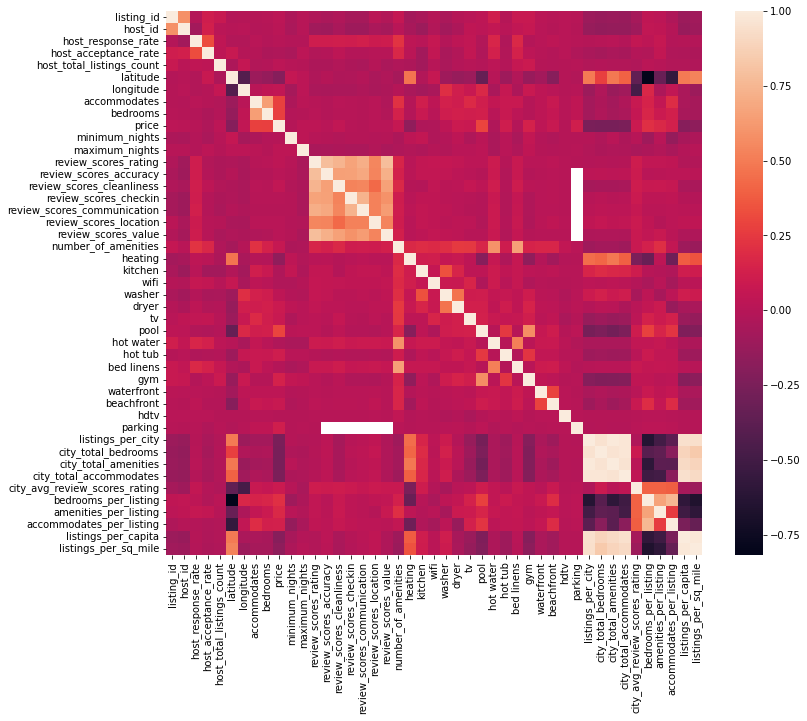

In [50]:
plt.subplots(figsize=(12,10))
sns.heatmap(AirBnB.corr());

In [51]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'price', data=AirBnB, alpha=0.5)
        ax.set(xlabel=col, ylabel='listing price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [52]:
AirBnB.select_dtypes(include=[np.number]).columns

Index(['listing_id', 'host_id', 'host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_amenities', 'listings_per_city',
       'city_total_bedrooms', 'city_total_amenities',
       'city_total_accommodates', 'city_avg_review_scores_rating',
       'bedrooms_per_listing', 'amenities_per_listing',
       'accommodates_per_listing', 'listings_per_capita',
       'listings_per_sq_mile'],
      dtype='object')

In [53]:
features = [x for x in AirBnB.select_dtypes(include=[np.number]).columns if x not in ['listing_id', 'host_id', 'price']]

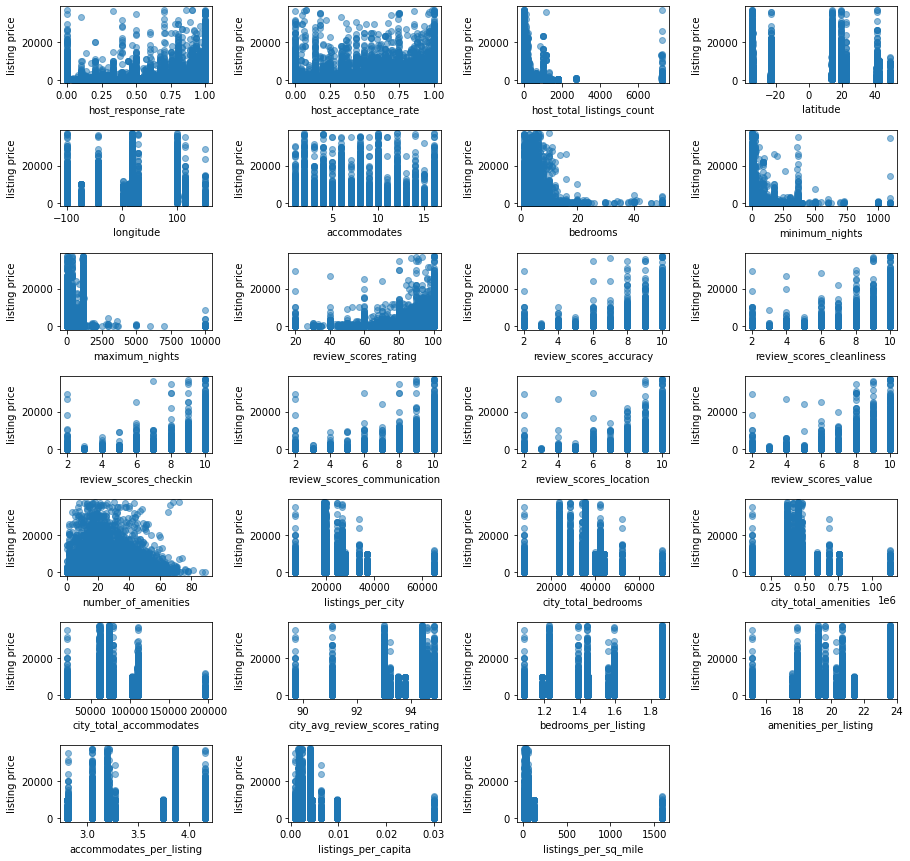

In [54]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [55]:
AirBnB.price.max()

37364